#**TP 2 - Régression linéaire et optimisation**

But : implémenter deux stratégies de résolutions de la régression *Linéaire*

Cours : M1 MIAGE apprentissage (Dauphine) - 2023-2024

In [1]:
# libairies utiles pour ce cours

# calcul numériques (calculs d'estimateurs)
import numpy as np

#figures et illustrations
import matplotlib.pyplot as plt

##I Génération de données synthétitiques

On fournit du code pour générer des données synthétiques.

*   Les observations de la variable $x$ sont échantillonés suivant une loi gaussienne multivariée (avec l'identité comme covariance).
*   On échantillonne n =100 observations est en 2 dimensions (stocké dans la matrice $X$).
*   On ajoute une colonne constante (valeur 1) dans la matrice $X$.
*   On fixe un vecteur $w$, puis on génère le vecteur $y=X \times w + \epsilon \times b$ (avec $b$ un bruit gaussien de moyenne nulle et variance unité) en posant pour l'instant $\epsilon = 1e-5$ (1pt)


In [2]:
n=100
dim=2
eps=1e-5 # on pourra faire varier ce chiffre

X= np.random.multivariate_normal(np.zeros(dim), np.eye(dim), n)
X=np.column_stack((X,np.ones(n)))

w = np.array([[3, 2, -1]])
y = np.dot(X,w.T) +eps*np.random.normal(size=(n,1))


Observations :

## II Première méthode de calcul (formule explicite)

1.  En se souvenant que que $w^*= (X^\top X)^{-1}X^\top y$, on calcule l'estimateur $\hat{w}$.
2.  Calculer l'écart $||w -\hat{w}||_2$ (on pourrait aussi regarder l'erreur quadratique moyenne des prédictions du modèle)

In [4]:
#calcul de w chapeau
what = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,y))
print(what)

[[ 2.99999911]
 [ 1.99999952]
 [-0.99999968]]


In [6]:
# calcul de l'ecart entre what et w
ecart = np.linalg.norm(what-w)
print(ecart)

7.211101494741914


## II Deuxième méthode de calcul (descente de gradient)

1.  Estimater $\hat{w}$ en appliquant une descente de gradient à pas fixe.
2.  Calcul l'écart $|| w - \hat{w}||_2$
3.  Tracer l'évolution de la fonction coût au fil des itérations ? (erreur quadratique)
4.  Comparer cette méthode à la méthode précédente.

init (3, 1)
init (100, 3)
diff iterate
129
[[ 2.99999911]
 [ 1.99999952]
 [-0.99999968]]
9.515244924833758e-09


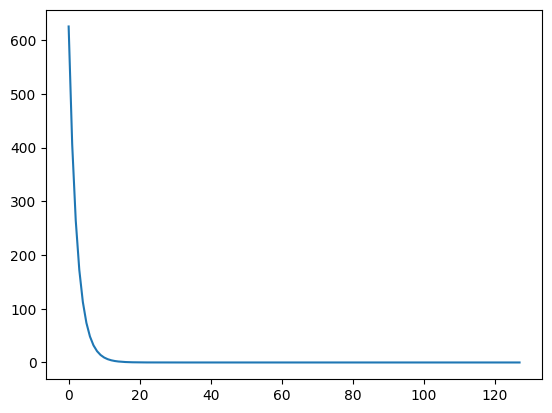

In [23]:
# squelette du code de descente de gradient
# Modifier le calcul du gradient et de la fonction de cout

import math


itermax = 10000  # nombre d'itérations maximum
i = 1
notconv = True  # critere de convergence

eta = 1e-3  # pas de la descente de gradient

wi = np.random.normal(size=(dim+1, 1))  # initialisation aléatoire de wi
print("init", wi.shape)
print("init", X.shape)

loss = []  # calcul de la fonction cout à chaque iteration
lold = np.inf
while (i <= itermax) and (notconv):
    wold = wi
    # calcul du gradient /!\ A MODIFIER /!\
    # grad = 2 * np.dot(X.T, np.dot(X, wi)-y)
    grad = -2 * X.T@y + 2 * X.T@X@wi
    wi = wold-eta*grad  # mise à jour de l'itéré courant
    
    # calcul de la fonctione de perte /!\ A MODIFIER /!\
    li = np.linalg.norm(y-X@wi)**2

    loss.append(li)

    if np.linalg.norm(wold-wi) < 1e-10:  # critère d'arrêt 1
        notconv = False
        print("diff iterate")

    if li > lold:  # critère d'arrêt 2
        notconv = False
        print("rising loss")

    i += 1
    lold = li


print(i)  # dernière itération
plt.plot(loss)  # affichage de la perte (au fur et a mesure des des itérations)
print(wi)  # paramètre de l'hyperplan appris par la méthode
print(loss[-1])  # valeur de l'erreur à la fin de l'algorithme

Observations :

## III Pour aller plus loin

1. Proposer comment valider les algorithmes.
2. Ajouter des outliers pour voir la sensibilité des méthodes.
3. Valider la généricité de votre code en l'appliquant sur un autre jeu de données (de votre choix et potentiellement synthétique) de plus grande dimension.
4. Evaluer la sensibilité des approches au niveau du bruit $\epsilon$

